<a href="https://colab.research.google.com/github/derek-byte/NeoHacks-2.0/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leaf Health Classification

Dataset: https://www.kaggle.com/datasets/prasanshasatpathy/leaves-healthy-or-diseased?resource=download

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import os
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
data_dir='/content/drive/MyDrive/archive/leaves_healthy_or_diseased'
labels = ['Healthy', 'Diseased']
print("class :", labels[0], ",", labels[1])

class : Healthy , Diseased


In [5]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rescale = 1./255,
      rotation_range=50,
      horizontal_flip=True,
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2, 
      zoom_range=0.2,
      fill_mode='nearest',
      validation_split=0.3)
  
train_generator = train_datagen.flow_from_directory(
    data_dir, 
    subset="training", 
    shuffle=True, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)
validation_generator = train_datagen.flow_from_directory(
    data_dir, 
    shuffle=False, 
    seed=42,
    color_mode="rgb", 
    class_mode="categorical",
    subset="validation",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 3152 images belonging to 2 classes.
Found 1350 images belonging to 2 classes.


In [30]:
# split data 
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# print(len(data_dir))

data = data.map(lambda x,y: (x/255, y))

train_size = int(len(data_dir) * .7)
val_size = int(len(data_dir) * .15) + 1
test_size = int(len(data_dir) * .15) + 1

57


In [ ]:
train_batches = data_dir.take(train_size)
val_batches = data_dir.skip(train_size).take(val_size)
test_batches = data_dir.skip(train_size+val_size).take(test_size)

MobileNet V2 Architechture:
* 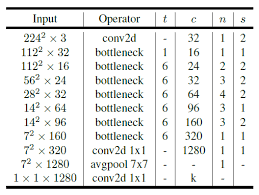

In [11]:
# Mobilenet V2
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(224, 224, 3), output_shape=[1280])
model = Sequential([
    feature_extractor,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(2, activation = "softmax")
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 2,914,882
Trainable params: 656,898
Non-trainable params: 2,257,984
_________________________________________________________________


In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator, 
    validation_data=validation_generator, 
    epochs=10, 
    validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/10
197/197 [==============================] - 1341s 7s/step - loss: 0.3746 - accuracy: 0.8303 - val_loss: 0.4900 - val_accuracy: 0.7641
Epoch 2/10
197/197 [==============================] - 1330s 7s/step - loss: 0.2936 - accuracy: 0.8763 - val_loss: 0.3598 - val_accuracy: 0.8237
Epoch 3/10
197/197 [==============================] - 1326s 7s/step - loss: 0.2324 - accuracy: 0.8975 - val_loss: 0.4679 - val_accuracy: 0.8095
Epoch 4/10
197/197 [==============================] - 1327s 7s/step - loss: 0.2456 - accuracy: 0.8934 - val_loss: 0.4092 - val_accuracy: 0.7939
Epoch 5/10
197/197 [==============================] - 1332s 7s/step - loss: 0.2088 - accuracy: 0.9156 - val_loss: 0.4359 - val_accuracy: 0.8036
Epoch 6/10
197/197 [==============================] - 1335s 7s/step - loss: 0.2137 - accuracy: 0.9137 - val_loss: 0.4242 - val_accuracy: 0.8110
Epoch 7/10
197/197 [==============================] - 1342s 7s/step - loss: 0.2046 - accuracy: 0.9093 - val_loss: 0.3849 - val_accuracy:

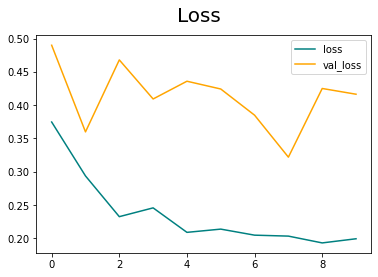

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

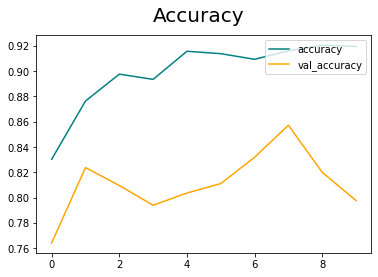

In [17]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [19]:
# Save model
import time
t = time.time()
export_path = "/content/drive/MyDrive/Leaf-Classification-2".format(int(t))
tf.keras.models.save_model(model, export_path)
export_path

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Leaf-Classification-2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Leaf-Classification-2/assets


'/content/drive/MyDrive/Leaf-Classification-2'

In [1]:
!pip install streamlit
!pip install streamlit-option-menu

In [2]:
!pip install pyngrok

  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=6186194556cd71dc8dea28c8444ebf3a0ef145fe2136e66d9475b7eb0dc9534d
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [3]:
!ngrok authtoken 

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip install gspread-pandas

In [21]:
%%writefile app.py

import streamlit as st
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mobile 
import tensorflow_hub as hub
import matplotlib.pylab as plt
import os
import random
import calendar 
from datetime import datetime
from streamlit_option_menu import option_menu

labels = ['Healthy', 'Diseased']
years = [datetime.today().year]
months = list(calendar.month_name[1:])
result = ""
# ages = [range(0:10)]

hide_st_style = """
              <style>
                #MainMenu {visibility: hidden;}
                footer {visibility: hidden;}
                header {visibility: hidden;}
                backgroundColor: "blue"
              </style>
                """
st.markdown(hide_st_style, unsafe_allow_html=True)

page_icon = ":seedling:"

st.title("Smart Greens" + " " + page_icon)

# NAVIGATION 
selected = option_menu(
  menu_title = None,
  options = ["Data Entry", "Logs"],
  icons = ["pencil-fill", "bar-chart-fill"],
  orientation = "horizontal"
)

from PIL import Image, ImageOps
@st.cache
def load_image(image_file):
  img = Image.open(image_file)
  return img

def upload(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (224, 224) )
    img = img /255
    return img

path = "/content/drive/MyDrive/Leaf-Classification"
reloaded = tf.keras.models.load_model(path, custom_objects={'KerasLayer':hub.KerasLayer})
def predict_reload(image):
    probabilities = reloaded.predict(np.asarray([img]))[0]
    class_idx = np.argmax(probabilities)
    return {labels[class_idx]: probabilities[class_idx]}

if selected == "Data Entry": 
  st.header("Health Check")
  uploaded_file = st.file_uploader("Choose an image file", type=["png", "jpeg", "jpg", "svg"])

  if uploaded_file is not None:
    # Convert the file to an opencv image
    file_bytes = np.asarray(bytearray(uploaded_file.read()),dtype=np.uint8)
    opencv_image = cv2.imdecode(file_bytes, 1)
    opencv_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(opencv_image, (224,224))
    st.image(load_image(uploaded_file), width=224)

    # Saving File
    complete_path = os.path.join("/content/Leaf_Images", uploaded_file.name)

    # CREATE THIS FILE SOURCE EVERYTIME ON GOOGLE COLAB
    with open(complete_path, "wb") as f:
      f.write(uploaded_file.getbuffer())
    st.success("File Saved")

    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        horizontal_flip=True,
        width_shift_range=0.2, 
        height_shift_range=0.2,
        shear_range=0.2, 
        zoom_range=0.2,
        fill_mode='nearest',
        validation_split=0.3)
    
    validation_generator = train_datagen.flow_from_directory(
      "/content/Leaf_Images", 
      color_mode="rgb", 
      shuffle=False, 
      seed=None,
      class_mode="categorical",
      subset="validation",
      target_size=(224,224),
      batch_size=1)

    img = upload(complete_path)
    prediction = predict_reload(img)
    result = list(prediction.keys())[0]
    st.success("PREDICTED: class: %s, confidence: %f" % (list(prediction.keys())[0], list(prediction.values())[0]))

  # INPUT 
  st.header("List New Plant")
  with st.form("entry_form", clear_on_submit=True):
    col1, col2, = st.columns(2)
    col1.selectbox("Select Month:", months, key="month")
    col2.selectbox("Select Year:", years, key="year")

    "---"

    # with st.expander("Age"):
    #  comment = st.number_input(f"{income}:", min_value=0, format="%i", step=10, key=income)
    with st.expander("Name"):
      comment = st.text_area("", placeholder="Enter a name...", key="name")
    with st.expander("Comment"):
      comment = st.text_area("", placeholder="Enter a comment here...", key="comment")

    "---"
    submitted = st.form_submit_button("Save Data")
    if submitted:
      period = str(st.session_state["year"]) + "_" + str(st.session_state["month"])
      st.success("Data Saved")

else: 
  st.header("Logs")
  time = str(st.session_state["year"]) + "_" + str(st.session_state["month"])
  name = str(st.session_state["name"])
  comment = str(st.session_state["comment"])
  # if result != undefined:
  #  health = result

  st.write(f"Name: {name}")
  st.write(f"Time: {time}")
  st.write(f"Comments: {comment}")
  st.write(f"Health Check Result: {result}")


Overwriting app.py


In [ ]:
from pyngrok import ngrok
# Setup a tunnel to the streamlit port 8501
public_url = ngrok.connect(port='80')
print(public_url)
!streamlit run --server.port 80 app.py >/dev/null

NgrokTunnel: "http://3f02-34-125-127-56.ngrok.io" -> "http://localhost:80"
2022-08-07 21:19:00.954 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


t=2022-08-07T21:19:02+0000 lvl=warn msg="failed to open private leg" id=0ee2cd8a953f privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
t=2022-08-07T21:19:03+0000 lvl=warn msg="failed to open private leg" id=55b2d4a150ac privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"


2022-08-07 21:19:10.392007: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-07 21:19:10.402 Using /tmp/tfhub_modules to cache modules.


In [6]:
!pgrep streamlit